In [ ]:
pip install mlxtend

C:\Users\Sushanth Reddy\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Item Sets:
    support                            itemsets
0       0.2                            (1_Beer)
1       0.2                          (1_Cereal)
2       0.2                         (1_Diapers)
3       0.2                            (1_Milk)
4       0.2                         (1_Shampoo)
5       0.2                           (2_Bread)
6       0.2                           (2_Chips)
7       0.2                     (2_Conditioner)
8       0.2                           (2_Wipes)
9       0.2                          (2_Yogurt)
10      0.2                       (3_Baby food)
11      0.2                            (3_Eggs)
12      0.2                           (3_Fruit)
13      0.2                           (3_Pizza)
14      0.2                            (3_Soap)
15      0.2                   (2_Chips, 1_Beer)
16      0.2                   (3_Pizza, 1_Beer)
17      0.2                (2_Yogurt, 1_Cereal)
18      0.2                 (3_Fruit, 1_Cereal)
19      0.2         

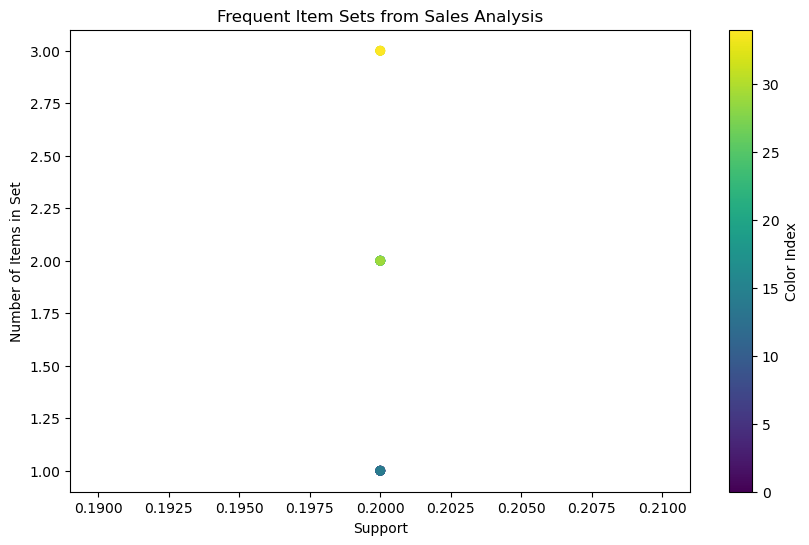

Top 5 Item Sets:
   support     itemsets
0      0.2     (1_Beer)
1      0.2   (1_Cereal)
2      0.2  (1_Diapers)
3      0.2     (1_Milk)
4      0.2  (1_Shampoo)


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the provided dataset (skipping the first row)
data = {
    'Transaction ID': [i for i in range(1, 21)],
    1: ['Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo', 'Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo',
               'Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo', 'Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo'],
    2: ['Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner', 'Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner',
               'Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner', 'Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner'],
    3: ['Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap', 'Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap',
               'Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap', 'Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap'],
    4: ['Butter', 'Juice', 'Milk', 'Soda', 'Toothpaste', 'Cereal', 'Eggs', 'Diapers', 'Soda', 'Toothpaste',
               'Butter', 'Granola', 'Formula', 'Snacks', 'Mouthwash', 'Juice', 'Coffee', 'Formula', 'Snacks', 'Mouthwash']
}

df = pd.DataFrame(data)

# Create a function to one-hot encode the transaction data
def encode_data(data):
    basket = data.drop(columns=['Transaction ID'])
    basket = pd.get_dummies(basket)
    return basket

# Apply one-hot encoding to the dataset
basket = encode_data(df)

# Apply Apriori to find frequent item sets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display frequent item sets and association rules
print("Frequent Item Sets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(association_rules_df)

# Create a scatterplot of frequent item sets with colors
plt.figure(figsize=(10, 6))

# Assign unique colors to items
colors = np.arange(len(frequent_itemsets))

# Plot the scatterplot
plt.scatter(frequent_itemsets['support'], frequent_itemsets['itemsets'].apply(lambda x: len(x)), c=colors, cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Number of Items in Set')
plt.title('Frequent Item Sets from Sales Analysis')
plt.colorbar(label='Color Index')

# Show the plot
plt.show()

# Find the top N item sets with the highest support values (e.g., top 5)
top_N = 5
top_itemsets = frequent_itemsets.nlargest(top_N, 'support')

# Display the top N item sets
print(f"Top {top_N} Item Sets:")
print(top_itemsets)
 
    



In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Create a DataFrame from the provided dataset (skipping the first row)
data = {
    'Transaction ID': [i for i in range(1, 21)],
    1: ['Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo', 'Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo',
        'Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo', 'Milk', 'Cereal', 'Diapers', 'Beer', 'Shampoo'],
    2: ['Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner', 'Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner',
        'Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner', 'Bread', 'Yogurt', 'Wipes', 'Chips', 'Conditioner'],
    3: ['Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap', 'Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap',
        'Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap', 'Eggs', 'Fruit', 'Baby food', 'Pizza', 'Soap'],
    4: ['Butter', 'Juice', 'Milk', 'Soda', 'Toothpaste', 'Cereal', 'Eggs', 'Diapers', 'Soda', 'Toothpaste',
        'Butter', 'Granola', 'Formula', 'Snacks', 'Mouthwash', 'Juice', 'Coffee', 'Formula', 'Snacks', 'Mouthwash']
}

df = pd.DataFrame(data)

# Create a function to one-hot encode the transaction data
def encode_data(data):
    basket = data.drop(columns=['Transaction ID'])
    basket = pd.get_dummies(basket)
    return basket

# Apply one-hot encoding to the dataset
basket = encode_data(df)

# Apply Apriori to find frequent item sets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Find the top N item sets with the highest support values (e.g., top 5)
top_N = 5
top_itemsets = frequent_itemsets.nlargest(top_N, 'support')

# Display the top N item sets
print(f"Top {top_N} Item Sets:")
print(top_itemsets)


Top 5 Item Sets:
   support     itemsets
0      0.2     (1_Beer)
1      0.2   (1_Cereal)
2      0.2  (1_Diapers)
3      0.2     (1_Milk)
4      0.2  (1_Shampoo)


C:\Users\Sushanth Reddy\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\Sushanth Reddy\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


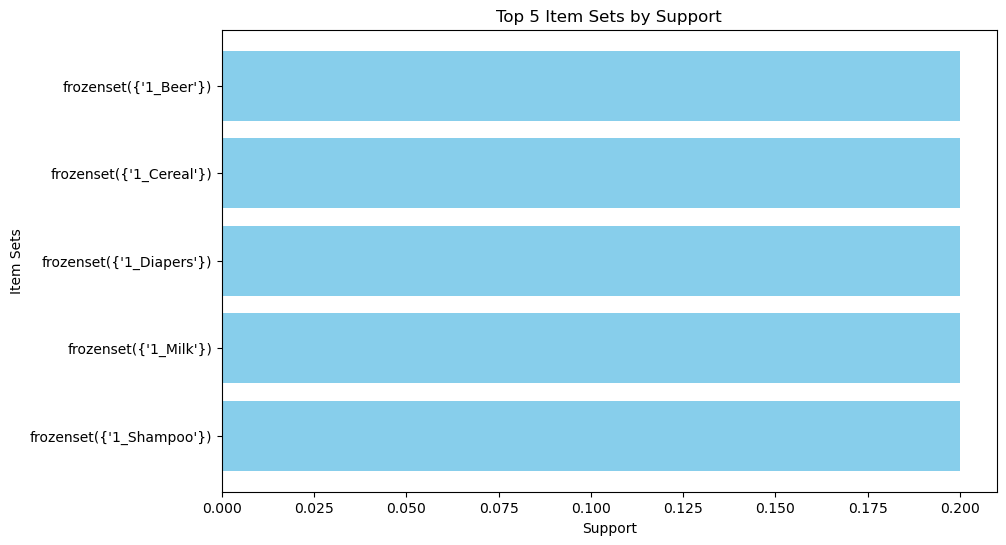

In [4]:
df = pd.DataFrame(data)

# Create a function to one-hot encode the transaction data
def encode_data(data):
    basket = data.drop(columns=['Transaction ID'])
    basket = pd.get_dummies(basket)
    return basket

# Apply one-hot encoding to the dataset
basket = encode_data(df)

# Apply Apriori to find frequent item sets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Find the top N item sets with the highest support values (e.g., top 5)
top_N = 5
top_itemsets = frequent_itemsets.nlargest(top_N, 'support')

# Create a bar chart for the top item sets
plt.figure(figsize=(10, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Item Sets')
plt.title(f'Top {top_N} Item Sets by Support')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest support item sets at the top

# Show the plot
plt.show()